#### Smart City project:

This code is just to visualize json files.

In [ ]:
import os
import shutil

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', 500)
from IPython.display import display
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
import sklearn.svm as svm

%matplotlib inline

In [ ]:
df = pd.read_json('uwo_sample_tls.json')  #Reading a json file into panda df.

#df.head()



In [ ]:
#SensorLog3001-12m.txt

#df = pd.read_csv('SensorLog3001-12m.txt', sep=",", header=None)  #Reading a json file into panda df.
data = np.loadtxt("SensorLog3001-12m.txt",dtype='str',delimiter=',')
#dataset=pd.read_csv("SensorLog3001-12m.txt", header=None, engine='python', sep=',', names=None, 
#                index_col=None, usecols=None, squeeze=False)

#dataset.head()

#print(np.shape(data))

dataset = pd.DataFrame({'House_Number': data[:, 0], 'Sensor_num': data[:, 1], 'Status': data[:, 2], 'Day': data[:, 3], 'Month': data[:, 4], 'Year': data[:, 5], 'Hour': data[:, 6], 'Min': data[:, 7], 'Counter': data[:, 8], 'Time_elapsed': data[:, 9]}
                      , columns=['House_Number', 'Sensor_num', 'Status','Day','Month', 'Year', 'Hour', 'Min', 'Counter','Time_elapsed' ])

dataset.head(40)

#bed = dataset[Sensor_num='Sensor 5']

#bed = dataset[dataset['Sensor_num']=='Sensor 8']

status = dataset.Status.values

print(status)

print(status[0].split())

for i,state in enumerate(status):
    if state=='ABS Bed Sensor Occupied':
        status[i]= 1
    elif state=="Pat's Bedroom Motion Activated":   
        status[i]= 2
    elif 'Idle' in state:  
        status[i]= np.nan
    elif 'Vacated' in state:  
        status[i]= np.nan
    else:
        status[i]=0

        
dataset.drop('Status', axis = 1, inplace = True)

dataset['Status'] = status





dataset = dataset.dropna()
dataset.head(200)

bed = dataset
bed.head()

In [190]:
#bed.head()

#stacked = bed[['Status']].stack()
#bed.loc[:, ['Status']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()


#bed.head(20)

#type(bed.Status.values[0])

,Day,Month,Counter,Time_elapsed,Status
203,24,10,282,0,0
205,24,10,285,1,2
206,24,10,286,1,1
208,24,10,340,52,2
210,24,10,482,140,0
211,24,10,488,6,0
212,24,10,509,21,2
215,24,10,514,3,0
217,24,10,517,1,0
218,24,10,518,1,0


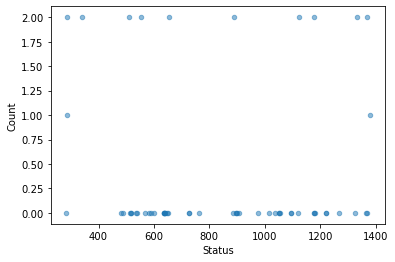

In [191]:
bed_data = bed.drop(['House_Number','Sensor_num','Year','Hour','Min'], axis = 'columns')
bed_data[['Status','Day','Month','Counter','Time_elapsed']] = bed_data[['Status','Day','Month','Counter','Time_elapsed']].astype(int)

bed_data_24 = bed_data[(bed_data['Day']==24) & (bed_data['Month']==10)]

#print(type(count[0]))
ax = bed_data_24.plot.scatter(x='Counter',y='Status',alpha=0.5)

ax.set_xlabel('Status')
ax.set_ylabel('Count')

bed_data_24.head(100)


Text(0, 0.5, 'Status')

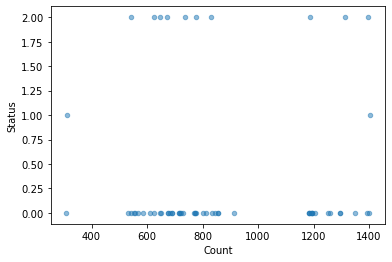

In [192]:

bed_data_25 = bed_data[(bed_data['Day']==25) & (bed_data['Month']==10)]

#print(type(count[0]))
ax = bed_data_25.plot.scatter(x='Counter',y='Status',alpha=0.5)

ax.set_xlabel('Count')
ax.set_ylabel('Status')

Text(0, 0.5, 'Status')

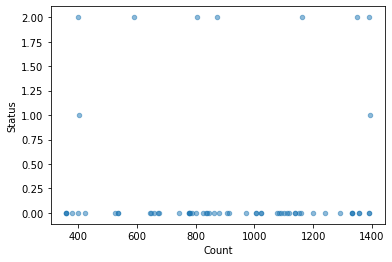

In [193]:
bed_data_26 = bed_data[(bed_data['Day']==30) & (bed_data['Month']==11)]

#print(type(count[0]))
ax = bed_data_26.plot.scatter(x='Counter',y='Status',alpha=0.5)

ax.set_xlabel('Count')
ax.set_ylabel('Status')

In [194]:

y = bed_data.Status
X = bed_data.drop('Status', axis = 'columns')


Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.5, random_state = 0)

In [20]:
# Visualize the decision function and support vectors 
def plotSVMfit(S,X,y):
    
    # Make a countour map of the decision function 
    # generate a meshgrid 
    numbins = 20
    x1 = np.linspace(X[:,0].min(),X[:,0].max(), numbins)
    x2 = np.linspace(X[:,1].min(),X[:,1].max(), numbins)
    X1, X2 = np.meshgrid(x1, x2)

    # Now get the decision function into the same format
    XX=np.c_[X1.reshape(-1,1),X2.reshape(-1,1)]
    YY=S.decision_function(XX)
    Y = YY.reshape((numbins,numbins))
    
    # Determine the levels we want to plot + width of lines 
    ymax = np.abs(Y).max()
    lev = np.linspace(-1,1,9)*ymax
    levWidth = np.array([1,1,1,1,3,1,1,1,1])/2

    # Figure out the suppport vectos 
    alpha = y*0
    alpha[S.support_]=1 # np.abs(S.dual_coef_)
    
    sb.scatterplot(X[:,0],X[:,1],hue=y,size=alpha+1,legend=False)
    plt.contour(X1,X2,Y,levels=lev,colors='black',linewidths=levWidth)




        


In [ ]:
y_pred=S.predict(Xtest)
print(y_pred)

In [10]:
bed_data.head()

,Day,Month,Counter,Time_elapsed,Status
8,23,10,625,14,0
13,23,10,629,0,0
16,23,10,635,0,0
18,23,10,638,0,0
22,23,10,650,3,2


In [19]:
odd_days = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]


odd_data = bed_data[bed_data['Day'].isin(odd_days)]

#odd_data.head(100)

even_data = bed_data[~bed_data['Day'].isin(odd_days)]

#even_data.head(100)


In [41]:
y = odd_data.Status
X = odd_data.drop('Status', axis = 'columns')

S = svm.SVC(C=10,kernel='rbf',gamma=10)
S.fit(X,y)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
y_test = even_data.Status
X_test = even_data.drop('Status', axis = 'columns')

y_pred=S.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


Confusion matrix, without normalization


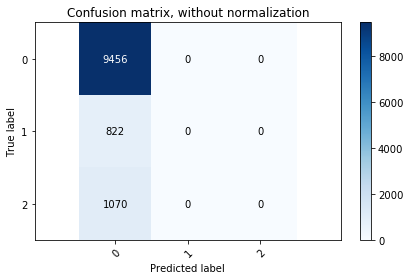

In [31]:
from sklearn.metrics import recall_score, make_scorer, confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    ax.axis('equal')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    return ax,cm



ax,cm = plot_confusion_matrix(y_test, y_pred, classes= np.array([0,1,2]))


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[0 0 0 ... 0 0 0]
Confusion matrix, without normalization


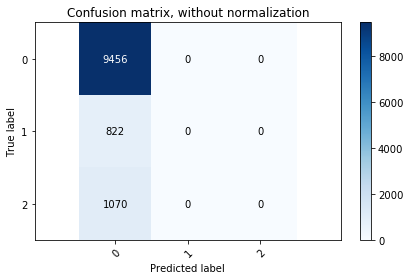

In [34]:
y_pred=S.predict(X_test)
print(y_pred)
ax,cm = plot_confusion_matrix(y_test, y_pred, classes= np.array([0,1,2]))

In [52]:
import torch
from IPython.display import clear_output

def live_plot(X, y, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    plt.scatter(X[y==0,0], X[y==0,1], color='red')
    plt.scatter(X[y==1,0], X[y==1,1], color='blue')
    plt.scatter(X[y==2,0], X[y==2,1], color='green')
    plt.title(title)
    plt.show()

y = odd_data.Status
X = odd_data.drop('Status', axis = 'columns')

X = X.values
y = y.values

y_test = even_data.Status
X_test = even_data.drop('Status', axis = 'columns')

X_test = X_test.values
y_test = y_test.values

class NonLinearModel(torch.nn.Module):
    
    def __init__(self, input_size, num_classes, max_iter=1000, lr=1e-3):
        
        super().__init__()
        
        # Neural Network Architecture: 40 hidden units 
        self.dense1 = torch.nn.Linear(in_features=num_features, out_features=20*num_classes)
        self.activation1 = torch.nn.LogSigmoid()
        self.dense2 = torch.nn.Linear(in_features=20*num_classes, out_features=num_classes)
        self.activation2 = torch.nn.LogSigmoid()
        
    def forward(self, X):
        X = self.dense1(X)  
        X = self.activation1(X)
        X = self.dense2(X)
        X = self.activation2(X)
        return X

    
num_features = X.shape[1]
num_classes = 3
max_iter = 1000
model = NonLinearModel(num_features, num_classes)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
criterion = torch.nn.CrossEntropyLoss()

Xt = torch.FloatTensor(X)
yt = torch.LongTensor(y)

for i in range(max_iter):
    optimizer.zero_grad()
    y_pred = model(Xt)
    loss = criterion(input=y_pred, target=yt)
    loss.backward()
    optimizer.step()
    #if i % 100 == 0:
    #    with torch.no_grad():
    #        live_plot(y_pred.detach().numpy(), y, title=f"Loss at epoch {i}: {loss.item():.4f}")
            
with torch.no_grad():
    y_pred = model.forward(Xt)
    y_pred = torch.argmax(y_pred, dim=1).detach().numpy()
    print(f"Classifier Accuracy: {accuracy_score(y_true=y, y_pred=y_pred) * 100}%")

    
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)
y_pred=model(X_test)
print(y_pred)
ax,cm = plot_confusion_matrix(y_test, y_pred, classes= np.array([0,1,2]))

Classifier Accuracy: 9.623996620194339%
tensor([[-0., -0., -0.],
        [-0., -0., -0.],
        [-0., -0., -0.],
        ...,
        [-0., -0., -0.],
        [-0., -0., -0.],
        [-0., -0., -0.]], grad_fn=<LogSigmoidBackward>)


RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.